In [2]:
!pip install -q yfinance

In [3]:
!pip install tensorflow

In [4]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import tensorflow

In [5]:
import yfinance as yf
yf.pdr_override()

start = '2013-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579247,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117435,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022625,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065748,458707200


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-03,172.259995,173.630005,170.820007,172.399994,172.399994,49594600
2023-10-04,171.089996,174.210007,170.970001,173.660004,173.660004,53020300
2023-10-05,173.789993,175.449997,172.679993,174.910004,174.910004,48527900
2023-10-06,173.800003,177.990005,173.179993,177.490005,177.490005,57224100
2023-10-09,176.809998,179.050003,175.800003,178.990005,178.990005,42342200


In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579247,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117435,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022625,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065748,458707200


In [8]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


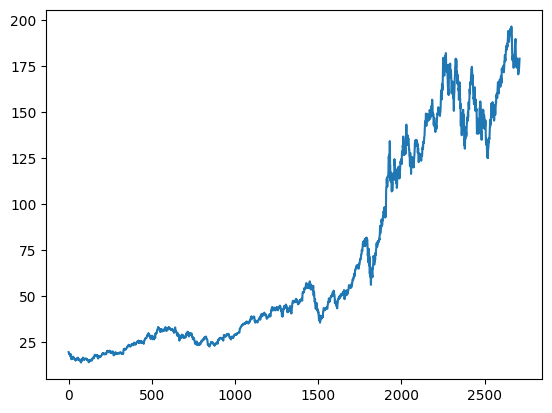

In [9]:
plt.plot(df.Close)

**A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price.**

In [10]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2706    182.032401
2707    182.031501
2708    182.054901
2709    182.109100
2710    182.178300
Name: Close, Length: 2711, dtype: float64

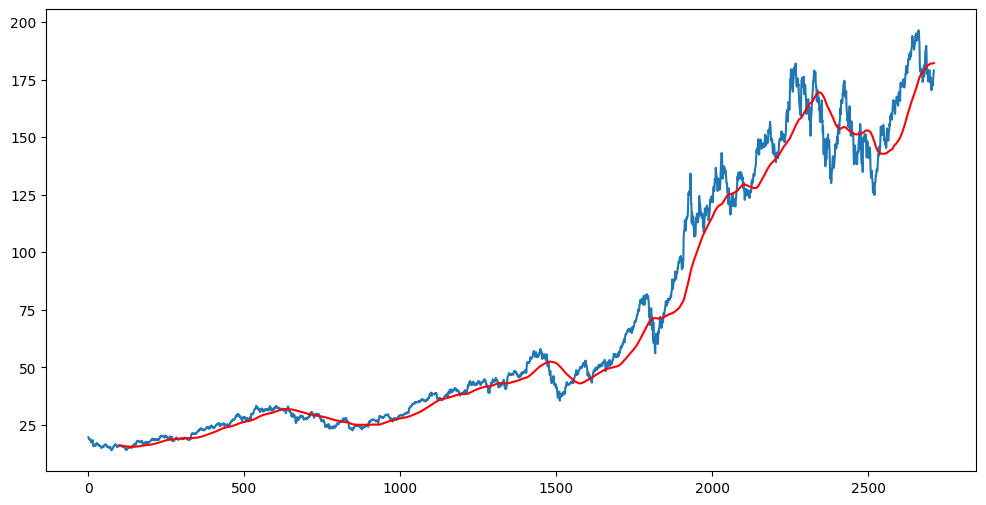

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2706    166.50940
2707    166.69520
2708    166.89720
2709    167.12280
2710    167.35625
Name: Close, Length: 2711, dtype: float64

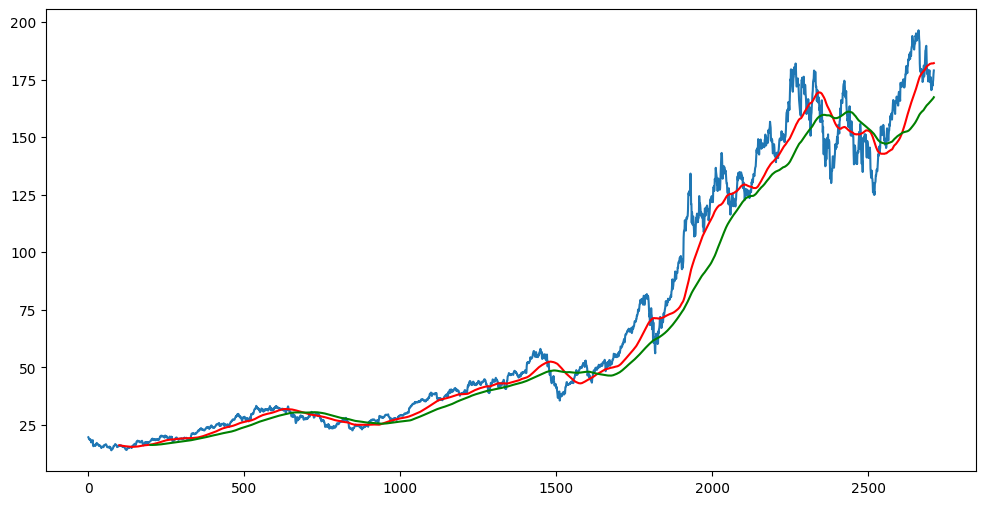

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(2711, 5)

In [15]:
#splitting data
#data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
#data_test=pd.DataFrame(df['Close'][0:int(len(df)*0.70): int(len(df))])
data_train = pd.DataFrame(df['Close'][:int(len(df) * 0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df) * 0.70):])
print(data_train.shape)
print(data_test.shape)

(1897, 1)
(814, 1)


In [16]:
data_train.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [17]:
data_test.head()

,Close
1897,96.522499
1898,96.327499
1899,98.357498
1900,97.000000
1901,97.272499


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.06756842],
       [0.06461417],
       [0.05817705],
       ...,
       [0.97317302],
       [0.99203252],
       [1.        ]])

In [20]:
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])
x_train,y_train=np.array(x_train), np.array(y_train)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [22]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout (0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout (0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout (0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout (0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

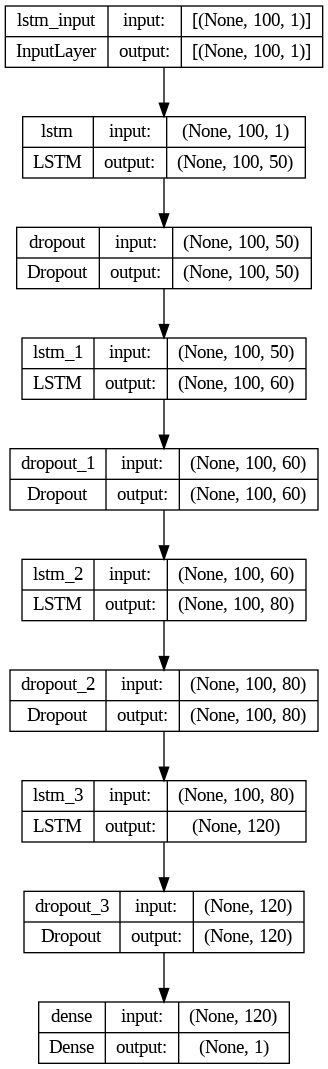

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_arch.png',show_shapes=True,show_layer_names=True)

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Checkpoint and monitoring val accuracy
mc = ModelCheckpoint(
    'keras_model.h5',
    monitor='loss',
    mode='min',
    verbose=1,
    save_best_only=True,
)
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50,verbose=2,shuffle=True,callbacks=[mc])

Epoch 1/50

Epoch 1: loss improved from inf to 0.02345, saving model to keras_model.h5
57/57 - 51s - loss: 0.0234 - 51s/epoch - 900ms/step
Epoch 2/50

Epoch 2: loss improved from 0.02345 to 0.00568, saving model to keras_model.h5
57/57 - 30s - loss: 0.0057 - 30s/epoch - 528ms/step
Epoch 3/50

Epoch 3: loss improved from 0.00568 to 0.00528, saving model to keras_model.h5
57/57 - 23s - loss: 0.0053 - 23s/epoch - 406ms/step
Epoch 4/50

Epoch 4: loss improved from 0.00528 to 0.00493, saving model to keras_model.h5
57/57 - 26s - loss: 0.0049 - 26s/epoch - 455ms/step
Epoch 5/50

Epoch 5: loss improved from 0.00493 to 0.00358, saving model to keras_model.h5
57/57 - 25s - loss: 0.0036 - 25s/epoch - 442ms/step
Epoch 6/50

Epoch 6: loss improved from 0.00358 to 0.00351, saving model to keras_model.h5
57/57 - 25s - loss: 0.0035 - 25s/epoch - 447ms/step
Epoch 7/50

Epoch 7: loss improved from 0.00351 to 0.00311, saving model to keras_model.h5
57/57 - 24s - loss: 0.0031 - 24s/epoch - 414ms/step
Epo

In [26]:
model.save('keras_model.h5')

In [27]:
data_test.head()

,Close
1897,96.522499
1898,96.327499
1899,98.357498
1900,97.000000
1901,97.272499


In [28]:
data_train.tail (100)

,Close
1797,74.544998
1798,72.019997
1799,73.162498
1800,68.379997
1801,68.339996
...,...
1892,95.752502
1893,95.919998
1894,95.477501
1895,97.057503


In [29]:
past_100_days = data_train.tail(100)

In [30]:
final_df = past_100_days.append(data_test, ignore_index=True)

<ipython-input-30-b24ca86cf791>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test, ignore_index=True)


In [31]:
final_df.head()

,Close
0,74.544998
1,72.019997
2,73.162498
3,68.379997
4,68.339996


In [32]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.13146786],
       [0.11347807],
       [0.12161801],
       [0.0875443 ],
       [0.0872593 ],
       [0.13259   ],
       [0.11568675],
       [0.13958997],
       [0.12209896],
       [0.1151702 ],
       [0.07445277],
       [0.10859769],
       [0.09094633],
       [0.04249862],
       [0.09547051],
       [0.03177602],
       [0.05074543],
       [0.03972001],
       [0.0363536 ],
       [0.0086743 ],
       [0.        ],
       [0.04009406],
       [0.03767168],
       [0.06068434],
       [0.04162587],
       [0.0542187 ],
       [0.05329248],
       [0.0294605 ],
       [0.03662077],
       [0.03035108],
       [0.06786243],
       [0.06244767],
       [0.07427464],
       [0.07769445],
       [0.0870634 ],
       [0.11164347],
       [0.10697682],
       [0.11100228],
       [0.10407351],
       [0.09361808],
       [0.0783713 ],
       [0.09213974],
       [0.09023387],
       [0.10437634],
       [0.10473259],
       [0.09655699],
       [0.1128547 ],
       [0.123

In [33]:
input_data.shape

(914, 1)

In [34]:
x_test = []
y_test = []
for i in range (100, input_data.shape [0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test.shape)
print (y_test.shape)

(814, 100, 1)
(814,)


In [36]:
y_predicted = model.predict(x_test)

26/26 [==============================] - 4s 124ms/step


In [37]:
y_predicted.shape

(814, 1)

In [38]:
y_test

array([0.28805016, 0.28666086, 0.30112392, 0.2914522 , 0.29339366,
       0.26184923, 0.26021053, 0.27584917, 0.26475254, 0.27748786,
       0.28568124, 0.3574266 , 0.37650287, 0.38168607, 0.38451812,
       0.4118768 , 0.39199904, 0.40350536, 0.37961991, 0.40551808,
       0.41976741, 0.41903712, 0.4168997 , 0.42370377, 0.42473682,
       0.44302943, 0.48645427, 0.49705217, 0.48969595, 0.50179008,
       0.49101405, 0.48957131, 0.51972638, 0.55634715, 0.53654059,
       0.46158915, 0.46215914, 0.40416438, 0.43622537, 0.40893789,
       0.39832216, 0.42226103, 0.42354347, 0.39924834, 0.38649519,
       0.36155886, 0.38464281, 0.39696845, 0.36355382, 0.37139093,
       0.40031705, 0.41941115, 0.41321268, 0.42546711, 0.4324493 ,
       0.40558929, 0.43038314, 0.40658679, 0.42026613, 0.41948242,
       0.43373174, 0.486668  , 0.46315659, 0.46379783, 0.46037797,
       0.44833727, 0.42667834, 0.43757907, 0.43301929, 0.42503965,
       0.41998114, 0.4200524 , 0.4310956 , 0.3926224 , 0.42197

In [39]:
y_predicted

array([[0.2560281 ],
       [0.2594973 ],
       [0.26295173],
       [0.2662285 ],
       [0.26934132],
       [0.27226317],
       [0.2746918 ],
       [0.27634412],
       [0.2771612 ],
       [0.2771708 ],
       [0.2765813 ],
       [0.27567804],
       [0.27510667],
       [0.27557778],
       [0.27801818],
       [0.28336844],
       [0.29231986],
       [0.30430096],
       [0.31831193],
       [0.33298117],
       [0.34735286],
       [0.3609024 ],
       [0.37328798],
       [0.3842343 ],
       [0.3936584 ],
       [0.4015603 ],
       [0.40827733],
       [0.41485405],
       [0.42209423],
       [0.43027574],
       [0.43944   ],
       [0.4491695 ],
       [0.4588436 ],
       [0.46832913],
       [0.4780802 ],
       [0.48809594],
       [0.49685603],
       [0.5030757 ],
       [0.50522375],
       [0.50281316],
       [0.49609596],
       [0.4858079 ],
       [0.47309017],
       [0.45922244],
       [0.44509637],
       [0.43126136],
       [0.4178902 ],
       [0.405

In [40]:
scaler.scale_

array([0.00712466])

In [41]:
scale_factor = 1/0.02099517
y_predicted=y_predicted * scale_factor
y_test=y_test*scale_factor

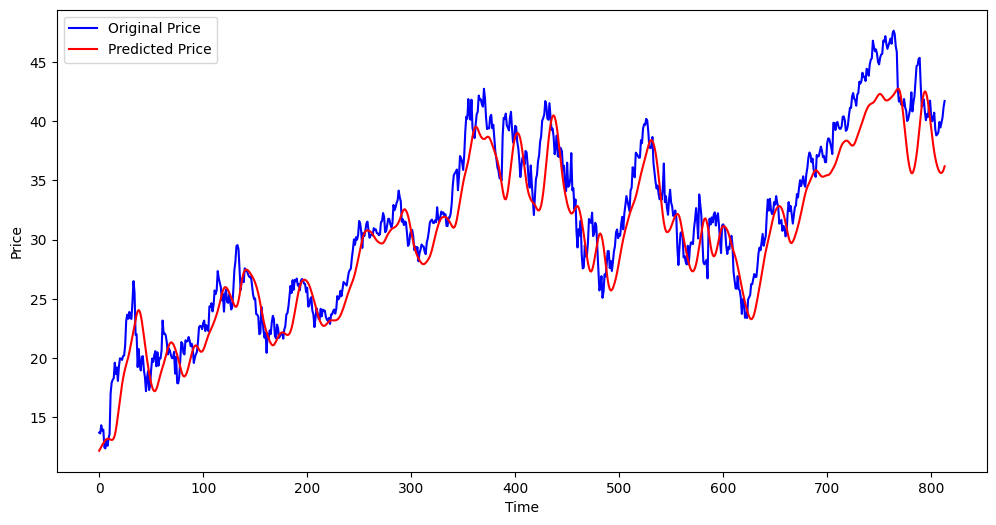

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot (y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [2]:
import streamlit as st
import yfinance as yf
import pandas as pd

# Step 1: Read stock names from CSV
file_path = "stock.csv"
stock_df = pd.read_csv(file_path)
stock_names = stock_df['Symbol'].tolist()

# Step 2 and 3: Check data availability using yfinance
valid_stock_names = []
for stock_name in stock_names:
    try:
        # Attempt to get data for the stock
        stock_data = yf.download(stock_name, start="2023-01-01", end="2023-11-20")
        
        # If data is available, add the stock to the valid_stock_names list
        if not stock_data.empty:
            valid_stock_names.append(stock_name)
    except Exception as e:
        # Handle any exceptions that may occur during the yfinance download
        st.warning(f"Could not retrieve data for {stock_name}: {str(e)}")

# Update the CSV file with only valid stocks
updated_stock_df = stock_df[stock_df['Symbol'].isin(valid_stock_names)]
updated_file_path = "stock.csv"
updated_stock_df.to_csv(updated_file_path, index=False)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AAWW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABAC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABAX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABCD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABCW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABDC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABGB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABTL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ABY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACAT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACPW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACSF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACTS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ACXM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADAT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADHD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADMP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADMS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADRA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADRD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADRU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADVS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ADXSW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEGN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEGR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AEPI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AERI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AETI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFAM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFCB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFFX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFOP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AFSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AGII']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['AGIIL']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AGNCB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AGND']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AGTC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AHGP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AHPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['AIMC']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AINV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AIRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AIXG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKAO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKER']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AKRX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALDR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALLB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALOG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALQA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALSK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALXA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ALXN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMAG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['AMBCW']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMCC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMCN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMDA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMOT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMOV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMRS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMSG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AMSGP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ANAC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ANAD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ANAT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ANCB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ANCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ANCX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['APAGF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['APDNW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['APOL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['APPY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['APRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['APSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AQXP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARCI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARCP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARCPP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARCW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARDM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AREX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARGS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARIA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARII']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARMH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARNA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARQL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARRS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ARUN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASBB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASBI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASCMA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASEI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASFI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASMI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASNA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ASRVP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATAX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATEA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATHN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATML']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATNY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATRM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATRS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ATTU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AUMA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AUMAU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AUMAW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AUXL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVEO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AVNR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AXAS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AXJS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AXPW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['AXPWW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BABY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BAGR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BAMM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BASI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBBY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBEPP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBNK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBOX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BBRY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCOM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BCOR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BDBD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BDCV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BDE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BDGE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BDMS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BDSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BEAV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BGCP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BHBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BIND']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BIOD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BIRT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKEP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKEPP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKMU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BKYF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BLMT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BLVD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BLVDU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BLVDW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BMTC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BNCL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BNCN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BNFT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BNSO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BOBE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BOCH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BOFI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BONA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BONT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BOTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BPFH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BPFHP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BPFHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BPOPN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRCD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRCM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRDR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BREW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BRKS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BSDM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BSF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BSFT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BSTC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BTUI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BVA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BVSN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWINA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWINB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BWLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['BYLK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACGU']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACGW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CACQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CADC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CADT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CADTR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CADTU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CADTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CALD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CALI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAMB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAMBU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAMBW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAPN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAPNW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CARB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CARO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['CASM']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CATM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CATYW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CAVM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBAK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['CBDE']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBIN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBLI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBMG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBMX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBNJ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBPO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBSHP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CBSTZ']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCCL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCIH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCMP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CECE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CELG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CELGZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEMI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CEMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CERU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CETV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CFGE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CFNL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CFRXW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CFRXZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CGIX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHEV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHFC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHFN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHKE']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHOP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHXF']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CHYR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CIDM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CIFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CIMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CISAW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CISG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CKEC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CKSW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLAC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLACU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLACW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLBH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLCT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLDN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLMS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLRBW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLSN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLUB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CLVS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMCSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMFN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMGE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMSB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNAT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNBKA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNCE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNDO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNIT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNLM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNLMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNLMU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNLMW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNTF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNXR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CNYD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COBZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CONE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CORE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CORI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COVS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COWN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['COWNL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPAH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPGI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPHD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['CPHR']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPLA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPST']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPTA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CPXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRAY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRDS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CREE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['CRESW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRWN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CRZO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSCD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSFL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSII']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSOD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSRE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CSUN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTCM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTCT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTIC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTRL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['CTRP']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTWS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CUI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CUNB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CVTI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CWAY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CXDC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYBE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYBX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYHHZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYNO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYOU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYRN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYTR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CYTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CZFC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DAEG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DARA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DATE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DCIX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DEPO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DEST']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DFRG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DFVL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DFVS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DGAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DHRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DISCA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DISCB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DISCK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DLBL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DLBS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DMND']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNBF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DNKN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DOVR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DPRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRAD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRAM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRNA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRWI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRWIW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DRYS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DSCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DSCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DSKX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DSKY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DSPG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTLK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTUL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTUS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTYL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DTYS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DVCR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DWA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DWCH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DXKW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DXM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['DXPS']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DYAX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EARS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EBIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EBSB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECHO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECOL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECTE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ECYT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EDGW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EDS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EEI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EEME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EEML']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EFII']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EGLT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EGOV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EGRW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EGT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EIGI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELGX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELNK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELON']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELOS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ELRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EMCF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EMCI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EMDI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EMEY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EMMSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENDP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENFC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENOC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENVI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENZY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EOPN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EPAX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EPAY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EPIQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EPRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EPZM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ERI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EROC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ERS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ERW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESBF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESCRP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESSX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESXB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ESYS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ETFC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ETRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EVAL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EVAR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EVBS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EVEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EVK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EVRY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXAC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXFO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXLP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EXXI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EYES']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['EZCH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBNK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBRC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FBSS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCCY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCHI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCLF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCSC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCTY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCVA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCZA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FCZAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FDEF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FDML']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FEIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FES']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FEYE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFBCW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFHL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFKT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FFNM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FHCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FINL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FISH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FISV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FLAT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FLDM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FLIR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FLML']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FLXN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FMBI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FMER']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FMI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FNBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FNFG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FNGN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FNHC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FNJN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FNSR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FOMX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FONE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FPRX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRAN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRED']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FRPHV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSAM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSCFL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSFR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSGI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSNN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSRV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FSYS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FTD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FTR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FUEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FULL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FULLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FWM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FWP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FXCB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FXEN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['FXENP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GAINO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GAINP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GALE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GALTU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GALTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GARS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GBNK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GBSN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GCVRZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GEVA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GFED']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GFN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GFNCP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GFNSL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GGAC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GGACR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GGACU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GGACW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GHDX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GKNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLADO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLDC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GLUU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GMAN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GMCR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GMLP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GNBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GNCA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GNCMA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GNMK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GNVC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GOMO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GOODP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GPIC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GRIF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GSVC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GTIV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GTWN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GTXI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GUID']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GULF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GWGH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GWPH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HABT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HAWKB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBHC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBMD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBNK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBOS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HBP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HCAC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HCACU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HCACW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HCAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HCBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HCT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDNG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDRA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDRAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDRAU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDRAW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HEOP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HFBC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HFFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HGSH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HIIQ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HILL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HKTV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HLSS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['HMHC']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HMIN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HMPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HMSY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HMTV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HNH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HNSN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HOTR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HOTRW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HPJ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['HPTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSGX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSKA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSNI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HSOL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HTBX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HTCH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HTWO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HTWR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HWAY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HWCC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HYGS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HYND']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IACI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IBCA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IBKC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ICEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ICLDW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ICON']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IDRA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IDSA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IDSY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IDTI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IFAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IFEU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IFNA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IFON']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IGTE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IIJI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IILG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IIN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IIVI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IKAN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IKGH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IKNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMDZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMMU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMMY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMNP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IMRS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ININ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INNL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INPH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INSY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INVT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INWK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IPAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IPCC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IPCI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IPCM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IPHS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IPXL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IQNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IRDMB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IRDMZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISBC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISCA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISIG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISLE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISNS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ISSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IVAN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['IXYS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JACQ']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JACQU']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JACQW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JASN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JASNW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JASO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JAXB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JCOM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JCS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JDSU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JGBB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JMBA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOBS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JOEZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JRJC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JTPY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JUNO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['JXSB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KANG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KBAL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KBIO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KBSF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KCAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KERX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KEYW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KFX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KIN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KITE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KLXI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KONE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KOOL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KRFT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KTWO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KUTV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KYTH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LABC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LABL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LACO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LAWS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LAYN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBIX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LBRKR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LDRH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LDRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEVY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEVYU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LEVYW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LGCY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LGCYO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LGCYP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LIME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LINE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LION']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LIOX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LIQD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LJPC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['LLEX']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LLNW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LLTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMCA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMCB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMCK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMIA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMNS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMOS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LMRK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LNBB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LNCE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LNCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LNDC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LOGM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LOJN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LONG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LOOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LORL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LOXO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LPHI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LPNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LPSB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LPTN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LRAD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LTXB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LVNTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['LVNTB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MAMS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MANT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MATR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['MBFI']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MBFIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MBII']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MBLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MBRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['MBTF']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MBVT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MCEP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MCGC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MCOX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MCRL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MCUR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDCA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDCO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDSO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDSY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDVN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MDVXU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MEET']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MEILW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MEILZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MELA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MELR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MEMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MENT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MERU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['METR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MFI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MFNC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MFRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MFRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MFSF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MGCD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MGI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MGLN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MHGC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['MHLDO']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MICT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MICTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MIFI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MIK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MINI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MITL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MKTO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MLHR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MLVF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['MMAC']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MNDL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['MNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MNRK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MNTA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOBI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOBL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOKO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOLG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MOSY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPEL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MPET']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MRD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MRKT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MRLN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MRVC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSBF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSCC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSFG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSLI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSON']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTGE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTGEP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTSC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTSL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MTSN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MULT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MWIV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MXIM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MXWL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MYL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MYOS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MZOR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NAME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NANO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NAVG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NBBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NBS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NBTF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NCIT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NDRM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEOT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['NETE']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NEWS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFEC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['NGHC']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NGHCP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NHTB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NILE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NLNK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NMRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NPBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NPSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRCIA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRCIB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['NSEC']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NSPH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTLS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NTRSP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NUTR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NUVA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVCN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVEEW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NVSL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NWBOW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NXTD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NXTDW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NXTM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYMTP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYMX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NYNY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OBAS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OBCI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OCLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OCLS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OCRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OGXI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OHAI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OHGI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OHRP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OIIM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OKSB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OLBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OMED']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONNN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONTY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ONVI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPHT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OPXA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ORBC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ORBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OREX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ORIG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ORIT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ORPN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSBCP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSHC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSIR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OSN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OTEL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OTIC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OTIV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OUTR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OVAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OVTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OXBRW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OXFD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OXGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OZRK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PAGG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PARN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PATIV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PBCP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PBCT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PBIB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PBIP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PBMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PBSK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCCC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCMI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCOM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PCYC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PDCE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PDII']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PDLI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEGI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEIX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PENX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PEOP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PERY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PETM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PETX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PFBI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PFPT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PGNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHII']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHIIK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PHMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PICO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PIH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PKT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLCM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLKI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLNR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLPM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['PMBC']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PMCS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['PME']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PMFG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PNRA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PNTR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POPE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['POZN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PPHM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PPHMP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRAH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRAN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRCP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGNL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRGX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRLS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRSC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRSS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRTO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRXI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PRXL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSAU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSBH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSDV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSEM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSTB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSTI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSTR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PSUN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTBI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTBIW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTIE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTLA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTNR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTRY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PULB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PVTB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PVTBP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PWRD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PWX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QADA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QADB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QINC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QLGC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QLIK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QLTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QQQC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QSII']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QTNT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QTNTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QTWW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUMU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QUNR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QVCA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['QVCB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RADA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RAVN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RBPAA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCII']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCPI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RCPT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RDEN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RECN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REDF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REGI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REMY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REPH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RESN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REXI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['REXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGDO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGDX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGSE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RIBTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RITTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RIVR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RJET']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RLJE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RLOC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RLOG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RLYP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RMGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RNET']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RNWK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROIA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROIAK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROIQ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROIQU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROIQW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROKA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROSG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ROVI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RPRXW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RPRXZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RPTP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RPXC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RRD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RRST']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RSTI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RSYS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RTIX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RTK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RTRX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RUTH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RVBD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RVLT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RXDX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RXII']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAEX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAFM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAJA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SALE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SANWZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SAPE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBBX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBCP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBLKL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBNYW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBRAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SBSA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SCAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['SCHN']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SCLN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SCMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SCOK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SCON']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SCSS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SCTY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SEV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SFLY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SFXE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGMS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGNL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGOC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['SGYP']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGYPU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SGYPW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SHLDW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SHLM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SHLO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SHOR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SHOS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SHPG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIAL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIGM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIMG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SINA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SINO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIVB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIVBO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SIXD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKBI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKIS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKUL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SKYS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SLCT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SLMAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SLTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SLXP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMAC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMACR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMACU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMED']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMTP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SMTX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNAK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNDK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNHY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNMX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNSS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SNTA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOCB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SODA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOHOL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SOHOM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SONA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SONC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SONS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SORL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPAN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPEX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPHS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPKE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPLS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPNC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPPI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPPRO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPPRP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPRT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SPU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SQBG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SQBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SQI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SQNM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SREV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SRNE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SRSC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SSFN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SSRG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SSRI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STBZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STCK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STFC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STML']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STMP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STNR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STPP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STRN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STRZA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['STRZB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SUBK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SUMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SUNS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SUSQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SUTR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SVBI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SWHC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SWIR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SWSH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYKE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYMC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYMX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYNT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYRX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SYUT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SZMK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['SZYM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TAPR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TASR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TAX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TAXI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TCBIL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TCBIP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TCBIW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TCFC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TCRD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TEAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['TECD']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TECU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TERP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TESO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TESS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TFM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TFSC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TFSCR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TFSCU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TFSCW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TGA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TGE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THOR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['THTI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TICC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TISA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TIVO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TKAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TKMR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TLMR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TNAV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TNGO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRCB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRCH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRGT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRIL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRIV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TROV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TROVU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TROVW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRTLU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TRTLW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TSC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TSRA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TSRE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TSRO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TST']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TSYS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TTHI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TTPH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TTS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TUBE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TUES']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TVIZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TWMC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['TYPE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UACL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBIC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBNK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBNT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UBSH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UCBA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UCFC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UDF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UEPS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UIHC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ULTI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UMPQ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UNIS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UNTD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UNXL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UPIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['URRE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['USAK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['USAT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['USATP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['USBI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['USCR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['USMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['USTR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UTEK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['UTIW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VALX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VASC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VDSI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VGGL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['VIAB']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIAS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VICL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIIZ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIMC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VISN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VIVO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VLCCF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VLTC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VLYWW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VNR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VNRAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VNRBP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VNRCP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VOLC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VPCO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRML']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRNG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRNGW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRTA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRTB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VRTU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['VSAR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VSCP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VTAE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VTL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VTSS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VVUS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VWR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['VYFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WAFDW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WAVX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WBB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WBKC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WBMD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WEBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WETF']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WFBI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WFD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WFM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WGBS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WHFBL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WHLRW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WIBC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WIFI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WILN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WIN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WLB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WLBPZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WLRH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WLRHU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WLRHW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WMAR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WMGI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WMGIZ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WPCS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WPPGY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WRES']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WSCI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WSFSL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WSTC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WSTG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTFCW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WTSL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['WWWW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XBKS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XCRA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XENT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XGTI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XGTIW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XIV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XLRN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XNPT']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XOOM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XPLR']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['XXIA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['YDIV']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['YDLE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['YHOO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['YOD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['YPRO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['YRCW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZAGG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZFGN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZGNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZHNE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZINC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZIONW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:


['ZIONZ']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZIOP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['ZIXI']: Exception('%ticker%: No timezone found, symbol may be delisted')


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZLTQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-11-20)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZSPH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ZU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
